In [ ]:
goals for today
* visualize temporal expressions
    * temporal coverage
    * t-order
    * relative temporal coverage
    * sentence of expressionos

* describe temporal expressions

In [51]:
import json
import re
import matplotlib.dates as mdates
#https://github.com/JMendes1995/py_heideltime
from py_heideltime import py_heideltime
from dateutil import parser

with open('2-3-testset.json') as json_file:
    data = json.load(json_file)


In [17]:
# Now extract text

#example from stackoverflow
#https://stackoverflow.com/questions/26494211/extracting-text-from-a-pdf-file-using-pdfminer-in-python

import io

from copy import deepcopy
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage


extractedtitles = [] # list of all titles
fulldates = [] #  list of all dates

docdates = {} # dict of docid-> dates

def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)



    fp.close()
    device.close()
    text = retstr.getvalue()
    retstr.close()
    
    reg1 = "'[^']+'"
    reg2 = '"[^"]+"'
    reg3 = '“[^“]+"'
    reg4 = "`[^`]+'"
    reg5 = '‘[^’]+’'

    matches = []
    matches.extend(re.findall(reg1, text))
    matches.extend(re.findall(reg2, text))
    matches.extend(re.findall(reg3, text))
    matches.extend(re.findall(reg4, text))
    matches.extend(re.findall(reg5, text))
    
    results = py_heideltime(text, language='Dutch')
    fulldates.extend([results[0]])
    
    docdates[path] = deepcopy(results)#py_heideltime(text, language='Dutch')
    
    matches = [m.replace('"', "").replace("'", "").replace("“", "").replace("`", "").replace("\n","").replace("’","").replace("‘","").strip().lower() for m in matches if len(m) < 100]
    extractedtitles.extend(matches)
    print(matches)
#    print(re.findall("/"([^"\\]*(\\.[^"\\]*)*)"|\'([^\'\\]*(\\.[^\'\\]*)*)\'/", text)
#“
    
    return text

print('brieven')
for brief in data['brieven']:
    data['brieven'][brief]['content'] = convert_pdf_to_txt('./brieven/' + str(brief) + '.pdf')
    print(brief)
    
if '' in data['memos']:
    data['memos'].pop('')
    
print()
print('memos')
for memo in data['memos']:
    data['memos'][memo]['content'] = convert_pdf_to_txt('./memos/' + str(memo) + '.pdf')
    print(memo)
        
print()
print('historie')
for h in data['histories']:
    if h != '':
        data['histories'][h]['content'] = convert_pdf_to_txt('./besluitdocs/' + str(h) + '.pdf')
        print(h)

brieven
['tegengaan onveilig, niet leefbaar en malafide ondernemersklimaat', 'passende ondersteuning en begeleiding bij een vergunningsaanvraag', 'extra regels vragen zorgvuldige uitvoering', 'passende ondersteuning en begeleiding bij een vergunningsaanvraag', 'projectplan', 'ondersteuning van ondernemers bij bijvoorbeeld invullen aanvraagformulieren', 'extra regels vragen zorgvuldige uitvoering']
6ffbfcd6-47c6-45d4-9572-52582985712d
['wonen', 'wonen', 'heycop', 'de waarde', 'groene laan']
1328dfaf-5593-42b3-9a9b-5a0f5d156c3e
['utrecht kiest voor gezonde lucht']
551ce314-c09f-480e-a06e-94e17df558ae
[]
07476354-b558-4b4b-93c2-17ff67dc859e
['online', 'offline', 'online', 'op straat', 'jonge aanwas', 'kracht van de wijk']
8a603db9-757f-4f7f-b083-86f72470a226
['bouwen', 'tijdelijke']
3ef920e4-b4f8-4f99-a31f-59ea51079a3c
['poort naar de binnenstad', 'poorten', 'afdwingen', 'poort naar de binnenstad', 'zebra-safe', 'verkeersveiligheid rondom basisschool de pijlstaart']
0b6db332-f1fc-4ca7-a85

In [18]:
#print(data['histories']['009fd1d9-dc31-4086-8132-18c568b0db61']['content'])

# Load the data so we can find all the doc titles
import pickle

#Load the knowledge base
path = "C:/Users/tmsch/Desktop/ADS_Thesis/Thomas/"
with open(path + "meetingsInformation.txt", "rb") as fp:   
    meetingsInformation = pickle.load(fp)
with open(path + "itemsInformation.txt", "rb") as fp:   
    itemsInformation = pickle.load(fp)
with open(path + "entriesInformation.txt", "rb") as fp:   
    entriesInformation = pickle.load(fp)

with open(path + "documentsInformation.txt", "rb") as fp:   
    documentsInformation = pickle.load(fp)    
with open(path + "listdocumentsInformation.txt", "rb") as fp:   
    listdocumentsInformation = pickle.load(fp)
with open(path + "meetdocumentsInformation.txt", "rb") as fp:   
    meetdocumentsInformation = pickle.load(fp)
    
    
displaynames = []
displayids = []
displaytypes = []

def norm(s):
    return s.replace('"', "").replace("'", "").replace("“", "").replace("`", "").replace("\n","").replace('.pdf',"").replace('.docx', '').replace('.doc', '').strip().lower()

for d in documentsInformation:
    #print(documentsInformation[d])
    displaynames.append(norm(documentsInformation[d]['displayname']))
    displayids.append(d)
    displaytypes.append('documentsInformation')
    
for d in listdocumentsInformation:
    displaynames.append(norm(listdocumentsInformation[d]['displayname']))
    displayids.append(d)
    displaytypes.append('listdocumentsInformation')
    
for d in meetdocumentsInformation:
    displaynames.append(norm(meetdocumentsInformation[d]['displayname']))
    displayids.append(d)
    displaytypes.append('meetdocumentsInformation')
    

In [19]:
#versie 1 : kijk of displaynames in documenten voorkomen
# resultaat: bijna niets nuttigs - bijna lalleen undescriptive titles die voorkomen in documenten (e.g. voorstel)

for d in displaynames:
    for brief in data['brieven']:
        if norm(d) in data['brieven'][brief]['content']:
            print(d)
      
print()
for d in displaynames:
    for brief in data['memos']:
        if norm(d) in data['memos'][brief]['content']:
            print(d)
            
print()
for d in displaynames:
    for brief in data['histories']:
        if norm(d) in data['histories'][brief]['content']:
            print(d)

voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
het bestemmingsplan
het bestemmingsplan
het bestemmingsplan
het bestemmingsplan
programma
programma
programma
programma
zienswijze
communicatieplan
voorbeelden
voorbeelden
lis
lis
lis
lis
lis
lis
lis
lis
lis
lis
lis
lis

voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
programma
aanpak jeugdgroepen

voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
voorstel
v

In [20]:
#aanpak 2: kijk naar gequotte titels in de documenten (e.g. `Aantrekkelijke Afvalabkken') en kijk daarna of dit voor komt in documenten
# resultaat: erg positief

uniques = 0

#lets see if our quoted titles are found in the list
for et in extractedtitles:
    count = 0
    for i, d in enumerate(displaynames):
        if et in d:
            count += 1
            savename = d
    if count == 1:
            uniques += 1
            print(et)
            print(savename)
            print(displaytypes[i])
            print()


print('extracted titles')
print('true')
print()
print('found')
print(len(extractedtitles))
print('found 1 match')
print(uniques)
            
#HET WERKT ALS JE ALLEEN MATCHT ALS ER MAAR 1 MATCH BESTAAT
    #alsnog een document dat niet de intended one is

passende ondersteuning en begeleiding bij een vergunningsaanvraag
m60 passende ondersteuning en begeleiding bij een vergunningsaanvraag
meetdocumentsInformation

extra regels vragen zorgvuldige uitvoering
m61 extra regels vragen zorgvuldige uitvoering
meetdocumentsInformation

passende ondersteuning en begeleiding bij een vergunningsaanvraag
m60 passende ondersteuning en begeleiding bij een vergunningsaanvraag
meetdocumentsInformation

extra regels vragen zorgvuldige uitvoering
m61 extra regels vragen zorgvuldige uitvoering
meetdocumentsInformation

integraal veiligheidsplan utrecht 2019-2022
info en bijdragen meepraters vaststelling integraal veiligheidsplan utrecht 2019-2022 web
meetdocumentsInformation

extracted titles
true

found
36
found 1 match
5


In [21]:
for d in displaynames:
    if 'zorgvuldige uitvoering' in d:
        print(d)

m61 extra regels vragen zorgvuldige uitvoering


In [22]:
s = 0

titles = 0
times = 0

for h in data['histories']:
    s += data['histories'][h]['urls']
    titles += data['histories'][h]['titles']
    times += len(data['histories'][h]['date_list'])
    times += len(data['histories'][h]['date_meeting'])
    
for b in data['brieven']:
    s += data['brieven'][b]['urls']
    titles += data['brieven'][b]['titles']
    times += len(data['brieven'][b]['date_list'])
    times += len(data['brieven'][b]['date_meeting'])

for m in data['memos']:
    s += data['memos'][m]['urls']
    titles += data['memos'][m]['titles']
    times += len(data['memos'][m]['date_list'])
    times += len(data['memos'][m]['date_meeting'])
    
print('URLs total')
print(s)
print(s / 30)

s = 0
for h in data['histories']:
    s += len(set(data['histories'][h]['url']))
for b in data['brieven']:
    s += len(set(data['brieven'][b]['url']))
for m in data['memos']:
    s += len(set(data['memos'][m]['url']))

print('URLs found')
print(s)
print(s / 30)

print('titles found')
print(titles)

print('useful dates')
print(times)

print('found dates')
ds = []
for doc in fulldates:
    ds.extend(set(doc))
print(len(fulldates))

URLs total
57
1.9
URLs found
56
1.8666666666666667
titles found
14
useful dates
69
found dates
29


    * kan je disambigueren door te kijken of er een URL of datum in dezelfde zin staat?
        * nee!  conclusie: het is een mogelijk interessante richting, maar we kunnen de precisie nog neit waarborgen
        * mogelijke oplossing: als 'recommended' suggereren ipv 

In [23]:

text = 'dit een test 17 januari 2013'
results = py_heideltime(text, language='Dutch')

print(results[0])
#"news" (news-style documents); "narrative" (narrative-style documents (e.g., Wikipedia articles)); "colloquial" (English colloquial (e.g., Tweets and SMS)); "scientific" 

[('2013-01-17', '17 januari 2013')]


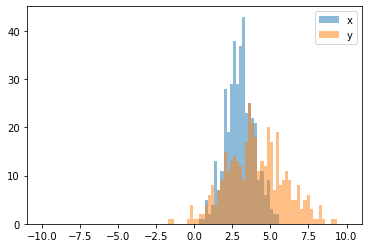

In [24]:
import random
import numpy
from matplotlib import pyplot

x = [random.gauss(3,1) for _ in range(400)]
y = [random.gauss(4,2) for _ in range(400)]

bins = numpy.linspace(-10, 10, 100)

pyplot.hist(x, bins, alpha=0.5, label='x')
pyplot.hist(y, bins, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [186]:
briefdates = []
briefuploads = []

historiedates = []
historieuploads = []

memodates = []
memouploads = []

def getDate(dates, d, curdate):
    newdates = []
    for d in dates[d][0]:
        date = d[0]
        if 'PRESENT_REF' in date:
            date = str(curdate)
        if not 'H' in date and not 'P' in date and not 'FUTURE_REF' in date and not 'X' in date:
            if len(date) == 4:
                date += '-01-01'
            date = date.replace('us','').replace('0016', '2016').replace('Q1', '02-01').replace('Q2', '05-01').replace('Q3', '08-01').replace('Q4', '11-01').replace('SU', '08-01')
            if date > '2000-01-01':
                newdates.append(parser.parse(date))
    return newdates


for d in docdates:
    did = d.split('/')[-1].split('.pdf')[0]
    
    print(d)
    print(len(docdates[d][0]))
    
    if 'brieven' in d:
        print(docdates[d][0])
        
        curdate = parser.parse(entriesInformation[did]['Ontvangstdatum'])
        briefdates.append(getDate(docdates, d, curdate))

        print(entriesInformation[did]['Ontvangstdatum'])
        briefuploads.append(parser.parse(entriesInformation[did]['Ontvangstdatum']))
        
    if 'memo' in d:
        print(docdates[d][0])
        print(entriesInformation[did]['Datum invoer'])
        memouploads.append(parser.parse(entriesInformation[did]['Datum invoer']))

        curdate = parser.parse(entriesInformation[did]['Datum invoer'])
        memodates.append(getDate(docdates, d, curdate))

#        memodates.append([parser.parse(x[0]) for x in docdates[d][0]])
        
    if 'besluitdocs' in d:
        print(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate'])
        historieuploads.append(parser.parse(meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']))

        curdate = meetingsInformation[itemsInformation[documentsInformation[did]['origin id']]['origin id']]['meetingdate']
        historiedates.append(getDate(docdates, d, curdate))
    
    print()

./brieven/6ffbfcd6-47c6-45d4-9572-52582985712d.pdf
19
[('1034', '1034'), ('2020-12-09', '9 december 2020'), ('2020-02-20', '20 februari 2020'), ('2010', '2010'), ('2020-02-20T02:47', '2:47'), ('2020-12-09', '9 december 2020'), ('P5Y', 'vijf jaar'), ('2020', '2020'), ('P1Y', 'jaren'), ('2020-12-09', '9 december 2020'), ('PAST_REF', 'eerder'), ('P1Y', 'een jaar'), ('PAST_REF', 'Eerder'), ('2020', 'dit jaar'), ('P1Y', 'een jaar'), ('PAST_REF', 'eerder'), ('PRESENT_REF', 'nu'), ('PRESENT_REF', 'huidige'), ('PRESENT_REF', 'op het moment')]
Dec  9 2020 12:00AM

./brieven/1328dfaf-5593-42b3-9a9b-5a0f5d156c3e.pdf
8
[('2020-12-10', '10 december 2020'), ('2001', '2001'), ('2013', '2013'), ('2017', '2017'), ('PAST_REF', 'eerder'), ('PRESENT_REF', 'momenteel'), ('2020-12-10', '10 december 2020'), ('FUTURE_REF', 'volgende')]
Dec 10 2020 12:00AM

./brieven/551ce314-c09f-480e-a06e-94e17df558ae.pdf
20
[('2020-12-10', '10 december 2020'), ('XXXX', 'jaarlijks'), ('2020-03-31', '31 maart 2020'), ('PRESEN

range(0, 32)
now plotting


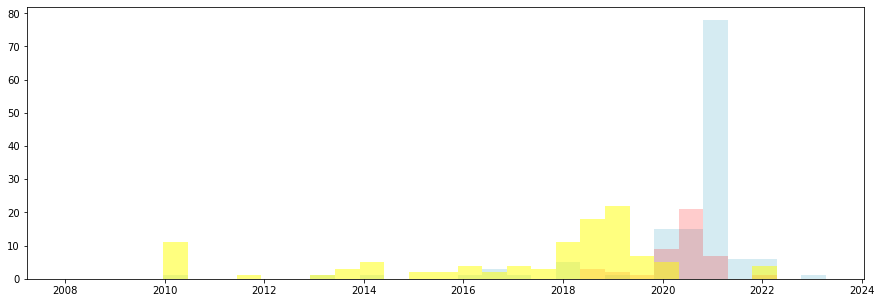

In [187]:
#TEMPORAL COVERAGE

#print(len(briefdates[0]))
#print(len(briefuploads))

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from matplotlib.dates import date2num

s = 2008
e = 2024

#set universal bin width
start = datetime.date(s,1,1) 
end = datetime.date(e,1,1) 
d = 6*30

bin_width = datetime.timedelta(days=d)

#print((e - s) * 360)
#print((e - s) * 360 / d)

#print(len(range(0, int(e - (s * 360) / (d)))))
print(range(0, int((e - s) * 360 / d)))
#print(len(range(0, int((float(e)-s) / float(d)))))

week = []
for i in range(0, int((e - s) * 360 / d)):
    week.append(start + (i) * bin_width)

numweek = date2num(week)

    
print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(sum(briefdates, []), bins=numweek, color='lightblue', alpha=0.5)
plt.hist(sum(memodates, []), bins=numweek, color='red', alpha=0.2)
plt.hist(sum(historiedates, []), bins=numweek, color='yellow', alpha=0.5)
plt.show()

[datetime.datetime(2020, 12, 9, 0, 0), datetime.datetime(2020, 12, 10, 0, 0), datetime.datetime(2020, 12, 10, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 11, 0, 0), datetime.datetime(2020, 12, 17, 0, 0), datetime.datetime(2020, 12, 14, 0, 0), datetime.datetime(2020, 12, 17, 0, 0)]

[0, -293, -3995, -293, 0, -343, 0, -343, 0, 0, 0]

range(-4000, 1000, 100)
now plotting


(array([ 0.,  0.,  3.,  3.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  0.,  4.,  0.,  3.,  0.,  0.,  0.,  3.,  0.,  0.,  3.,
         1.,  2.,  2.,  4.,  3.,  0.,  2.,  7., 14., 11.,  4.,  8., 12.,
         4.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  2.,  0.]),
 array([-4000, -3900, -3800, -3700, -3600, -3500, -3400, -3300, -3200,
        -3100, -3000, -2900, -2800, -2700, -2600, -2500, -2400, -2300,
        -2200, -2100, -2000, -1900, -1800, -1700, -1600, -1500, -1400,
        -1300, -1200, -1100, -1000,  -900,  -800,  -700,  -600,  -500,
         -400,  -300,  -200,  -100,     0,   100,   200,   300,   400,
          500,   600,   700,   800,   900]),
 <BarContainer object of 49 artists>)

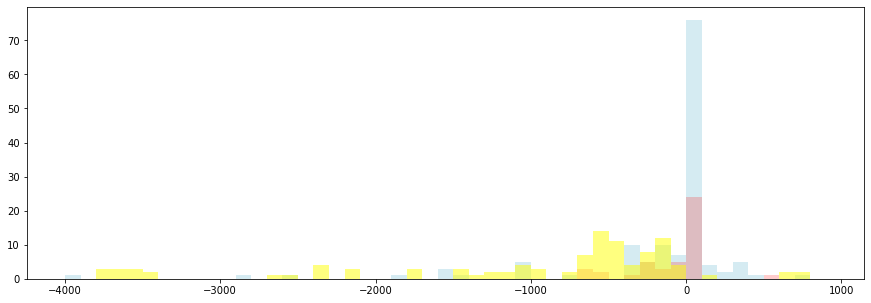

In [193]:
#relative temporal coverage

rbriefdates = []
rmemodates = []
rhistoriedates = []

print(briefuploads)

for i, curdate in enumerate(briefuploads):
    rbriefdates.append([(x - curdate).days for x in briefdates[i]])
for i, curdate in enumerate(memouploads):
    rmemodates.append([(x - curdate).days for x in memodates[i]])
for i, curdate in enumerate(historieuploads):
    rhistoriedates.append([(x - curdate).days for x in historiedates[i]])

print()
print(rbriefdates[0])

start = -4000
end = 1000
step = 100

print()
bs = range(start, end, step)
print(bs)

print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(sum(rbriefdates, []), bins=bs, color='lightblue', alpha=0.5)
plt.hist(sum(rmemodates, []), bins=bs, color='red', alpha=0.2)
plt.hist(sum(rhistoriedates, []), bins=bs, color='yellow', alpha=0.5)


In [50]:
!pip3 install python-dateutil

In [197]:
#Next step: plot document re-use instead!

#Store udos3 so we can investigate the dupes more easily (e.g. the temporal nature of document re-use)
with open(path + "uniquedossiers.txt", "rb") as fp:   
    udos = pickle.load(fp)

with open(path + "uniqueses.txt", "rb") as fp:   
    uniqueses = pickle.load(fp)

    
print(len(udos))
print(len(uniqueses))

3004
6320


In [288]:
#dict [id] = [days since id (= 0), days since uniqueses[0], since [1] etc]
datestore = {}

def getDate2(d):
    if d['origin type'] == 'entry':
        if 'Ontvangstdatum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Ontvangstdatum']
        elif 'Datum' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum']
        elif 'Datum invoer' in entriesInformation[d['origin id']]:
            curdate = entriesInformation[d['origin id']]['Datum invoer']
        else:
            print(entriesInformation[d[0]['origin id']])
            anchor
    else: #case item document
        curdate = meetingsInformation[itemsInformation[documentsInformation[d['id']]['origin id']]['origin id']]['meetingdate'] #date of id
    if curdate == None:
        return None
#        print(entriesInformation[d['origin id']])
    return parser.parse(curdate)



for u in uniqueses:
    datestore[u] = [0]
    
    curdate = getDate2(uniqueses[u][0])
    #print(curdate)
    for dupe in uniqueses[u]:
        #print()
#        print(dupe['origin type'])
#        print(getDate2(dupe))
#        print(curdate)
        if getDate2(dupe) != None and curdate != None:
            datestore[u].append((getDate2(dupe) - curdate).days)
            
        #print(datestore[u][-1])
    
    #normalize so most recent date is 0, rest is negative
    m = max(datestore[u])
    datestore[u] = list(([(x - m)  for x in datestore[u]]))  # divide by 365 if you want to plot per year

listofdates = []
for i in datestore:
    print(datestore[i])
    listofdates.extend(datestore[i])
#    print(datestore[u])
#    break

[0, 0, 0, 0, 0, 0, 0, 0]
[-35, -35, -35, -35, -35, 0, -35, 0]
[0, 0, 0, 0, 0, 0, 0, 0]
[-28, -28, -28, -28, -28, 0, -28, 0]
[-56, -56, -56, 0, -56, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-112, -112, -112, -112, -112, 0, -112, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-7, -7, 0, -7, 0, -7, 0, -7, 0, -7, 0]
[0, 0, 0, 0, 0

[-18, -18, -51, 0, -175, -18, -51, 0, -18, -51, 0, -175, -18, -51, 0, -18, -51, 0, -175]
[-18, -18, -51, 0, -18, -51, 0, -18, -51, 0, -18, -51, 0, -18, -51, 0]
[-33, -33, -33, -33, -33, -21, -4, 0, -33, -21, -4, 0]
[-29, -29, -17, 0, -29, -17, 0, -29, -17, 0, -29, -17, 0, -29, -17, 0]
[-33, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0]
[-33, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0]
[-33, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0, -33, -4, 0]
[-33, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0, -33, -21, -4, 0]
[-19, -19, -19, -19, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, 0, 0, -19, 0, -19, 0]
[-19, -19, 0, 0, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -19, 0, -19, 0, -19, 0, -19, 0]
[-19, -19, 0, -


range(-1000, 0, 20)
now plotting


(array([0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01, 2.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 7.000e+00, 0.000e+00,
        1.200e+01, 3.100e+01, 2.900e+01, 1.400e+01, 2.000e+01, 1.000e+01,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.700e+01,
        6.000e+00, 5.000e+00, 4.900e+01, 4.700e+01, 1.800e+01, 4.700e+01,
        1.360e+02, 1.240e+02, 1.870e+02, 3.900e+01, 3.300e+01, 3.000e+01,
        7.500e+01, 3.800e+01, 1.270e+02, 2.030e+02, 1.190e+02, 1.840e+02,
        3.170e+02, 3.990e+02, 5.730e+02, 9.550e+02, 1.620e+03, 3.399e+03,
        6.516e+03]),
 array([-1000,  -980,  -960,  -940,  -920,  -900,  -880,  -860,  -840,
         -820,  -800,  -780,  -760,  -740,  -720,  -700,  -680,  -660,
         -640,  -620,  -600,  -580,  -560,  -540,  -520,  -500,  -480,
         -460,  -440,  -420,  -400,  -380,  -360,  -340,  -320,  -300,
         -280,  -260,  -240,  -220,  -200,  -180,  -160,  -140,  -120,
         -100,   -80,   -60,   -

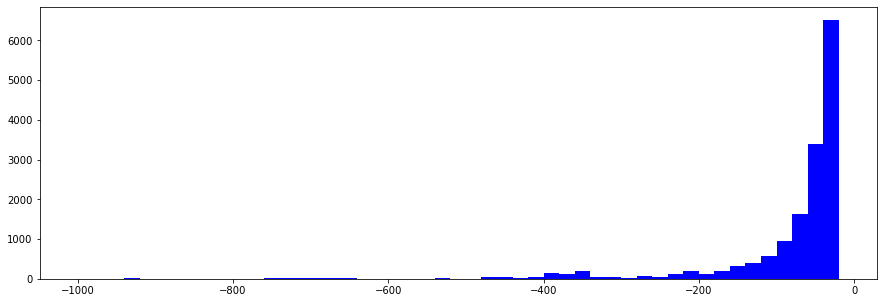

In [292]:
start = -1000
end = 0
step = 20

print()
bs = range(start, end, step)
print(bs)

print('now plotting')
#ig, ax = plt.subplots(1,1)
plt.rcParams['figure.figsize'] = [15, 5]
plt.hist(listofdates, bins=bs, color='blue')